In [99]:
'''
Random Forest applied to all of the selected taxa after filtering
Relative importance of each of the features is obtained

@Deb
'''

'\nRandom Forest applied to all of the selected taxa after filtering\nRelative importance of each of the features is obtained\n\n@Deb\n'

In [100]:
import pandas as pd

df_msm = pd.read_csv('../../data/msm_tt_rel_abundance_all.csv')
df_msm.shape

(43, 41)

In [101]:
df_msw = pd.read_csv('../../data/msw_tt_rel_abundance_all.csv')
df_msw.columns

Index(['d5__lactobacillus', 'd5__corynebacterium1', 'd5__gardnerella',
       'd5__sneathia', 'd5__staphylococcus', 'd5__anaerococcus',
       'd5__streptococcus', 'd5__finegoldia', 'd5__peptoniphilus',
       'd5__prevotella', 'd5__veillonella', 'd5__atopobium', 'd5__ezakiella',
       'd4__prevotellaceaeother', 'd5__megasphaera', 'd5__fastidiosipila',
       'd5__ralstonia', 'd5__corynebacterium', 'd5__granulicatella',
       'd5__porphyromonas', 'd5__dialister', 'd5__shuttleworthia',
       'd4__bifidobacteriaceaeother', 'd5__mycoplasma', 'd5__ureaplasma',
       'd5__escherichiashigella', 'd5__aerococcus',
       'd4__corynebacteriaceaeother', 'd5__parvimonas', 'd5__fusobacterium',
       'd5__gemella', 'd5__prevotella6', 'd5__brevibacterium',
       'd4__familyxiother', 'd5__campylobacter', 'd5__peptostreptococcus',
       'd5__neisseria', 'd5__acinetobacter', 'd5__facklamia', 'd5__chlamydia',
       'd5__treponema2'],
      dtype='object')

In [102]:
## add a column of status for msm and msw
import numpy as np

a = np.zeros(43)
b = np.ones(43)

df_msm['status'] = a
df_msw['status'] = b

In [103]:
## merge the dataframes using the columns and shuffle it

merged_df = pd.concat([df_msm,df_msw],axis=0,ignore_index=True)

merged_df
merged_df = merged_df.sample(frac=1)
merged_df = merged_df.fillna(0)

C:\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
## split data into training and testing parts
y = merged_df['status']
X = merged_df.drop(['status'],axis=1)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


0.896551724137931


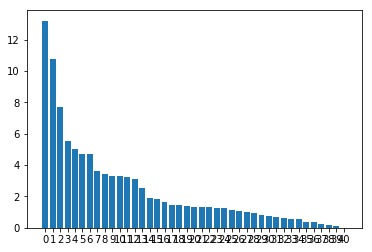

['d5__lactobacillus',
 'd5__gemella',
 'd5__parvimonas',
 'd5__megasphaera',
 'd5__shuttleworthia',
 'd5__mycoplasma',
 'd5__ralstonia',
 'd5__corynebacterium',
 'd5__facklamia',
 'd4__bifidobacteriaceaeother',
 'd5__fusobacterium',
 'd5__peptoniphilus',
 'd5__escherichiashigella',
 'd5__campylobacter',
 'd5__granulicatella']

In [105]:
### random forest and feature importance

from sklearn.ensemble import RandomForestClassifier
import collections


rand_for = RandomForestClassifier(n_estimators = 200,max_depth=2, random_state=0)

rand_for.fit(x_train,y_train)
#scores = cross_val_score(rand_for,X,y,cv=5)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# # print(rand_for.feature_importances_)

print(rand_for.score(x_test,y_test))
feat_imp = rand_for.feature_importances_*100
feat = x_train.columns

dict_feat_imp = dict(zip(feat,feat_imp))
sorted_feat_imp = dict(sorted(dict_feat_imp.items(), key = lambda kv : kv[1],reverse=True))
#print(rand_for.feature_importances_.sum())
sorted_feat_imp.keys()



### plot the following into a barplot
import matplotlib.pyplot as plt


plt.bar(range(41), sorted_feat_imp.values(),align='center')
plt.xticks(range(41), range(41))


plt.show()

lt1 = list(sorted_feat_imp)
lt1[:15]


In [106]:
## lasso regression

from sklearn import linear_model
reg_lnet = linear_model.Lasso(alpha = 0.00090)
reg_lnet.fit(x_train,y_train)

print(reg.score(x_test,y_test))
feat_imp2 = map(abs,reg_lnet.coef_)
feat = X.columns    
dict_feat_imp2 = dict(zip(feat,feat_imp2))

sorted_feat_imp2 = dict(sorted(dict_feat_imp2.items(), key = lambda kv : kv[1],reverse=True))
#print(rand_for.feature_importances_.sum())
lt2 = list(sorted_feat_imp2.keys())
print(lt2[:15])
print(lt1[:15])

0.8076016301070331
['d5__staphylococcus', 'd5__lactobacillus', 'd4__prevotellaceaeother', 'd5__veillonella', 'd5__gardnerella', 'd5__corynebacterium1', 'd5__finegoldia', 'd5__escherichiashigella', 'd5__ralstonia', 'd5__sneathia', 'd5__streptococcus', 'd4__bifidobacteriaceaeother', 'd4__corynebacteriaceaeother', 'd4__familyxiother', 'd5__acinetobacter']
['d5__lactobacillus', 'd5__gemella', 'd5__parvimonas', 'd5__megasphaera', 'd5__shuttleworthia', 'd5__mycoplasma', 'd5__ralstonia', 'd5__corynebacterium', 'd5__facklamia', 'd4__bifidobacteriaceaeother', 'd5__fusobacterium', 'd5__peptoniphilus', 'd5__escherichiashigella', 'd5__campylobacter', 'd5__granulicatella']


In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
reg.coef_



array([-3.31251232e+01,  2.47547770e+01, -1.99359942e+01, -7.19107412e+00,
       -3.82310770e+00, -2.49057950e+00, -1.11375215e+00,  4.08759559e+00,
       -8.36143362e+00, -6.17558556e+00,  5.76840799e+02, -5.29539887e-01,
       -2.76451486e+00,  2.23509672e+01, -2.48254121e-01,  1.50798008e+00,
        4.63206695e+00, -1.69145420e+00, -2.73829832e+00, -1.36535529e+01,
       -2.09390156e+00, -3.47535778e-01, -3.71766598e+00, -3.37619488e+00,
        2.79846944e+00, -2.04760589e+01,  8.80887771e+00, -2.19885910e+01,
       -5.43523185e+00, -9.53661440e+00, -9.31717458e+00, -5.23880122e+00,
        1.64550003e+01, -1.06002689e-01, -1.18280983e+01, -1.76421081e+00,
       -1.12842380e+00, -1.64420653e+00,  6.30675729e+02, -9.04813291e+00,
       -8.53856710e-01])